In [1]:
from ast import literal_eval
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from ensemblecalibration.calibration.config import config_p_value_analysis
from ensemblecalibration.calibration.experiments import experiment_h0_const_preds
from ensemblecalibration.calibration.p_value_analysis import npbe_test_vaicenavicius
from ensemblecalibration.calibration.calibration_estimates.distances import avg_euclidean_distance, avg_kl_divergence, jensen_shannon_dist

### Analysis of the p-values in the calibration test for testing Ensemble Calibration

In [85]:
df_h0 = pd.read_csv('../results/results_p_value_analysis_h0_1000_100_10_10.csv')

df_dists_w1 = pd.read_csv('../results/results_p_value_distance_analysis_1000_100_10_10_w1_distance.csv')
df_dist_euc = pd.read_csv('../results/results_p_value_distance_analysis_1000_100_10_10_euclidean_distance.csv')
df_dummy = pd.read_csv('../results/results_p_value_distance_analysis_dummy_1000_100_10_w1_distance.csv')

df_dummy_euc = pd.read_csv('../results/results_p_value_distance_analysis_dummy_500_100_3_avg_euclidean_distance.csv')

In [65]:
def convert_str_to_list(list_values: str):

    # replace linebreaks
    list_values = list_values.replace('\n', '')
    # replace double spaces
    list_values = list_values.replace('  ', ' ')
    # replace single spaces
    list_values = list_values.replace(' ', ', ')
    # replace double commas
    list_values = list_values.replace(', ,', ',')
    list_values = list_values.replace(', ,', ',')
    # remove commas before closing brackets
    list_values = list_values.replace(',]', ']')
    # remove commas after opening brackets
    list_values = list_values.replace('[,', '[')
    # convert string to list 
    return list_values

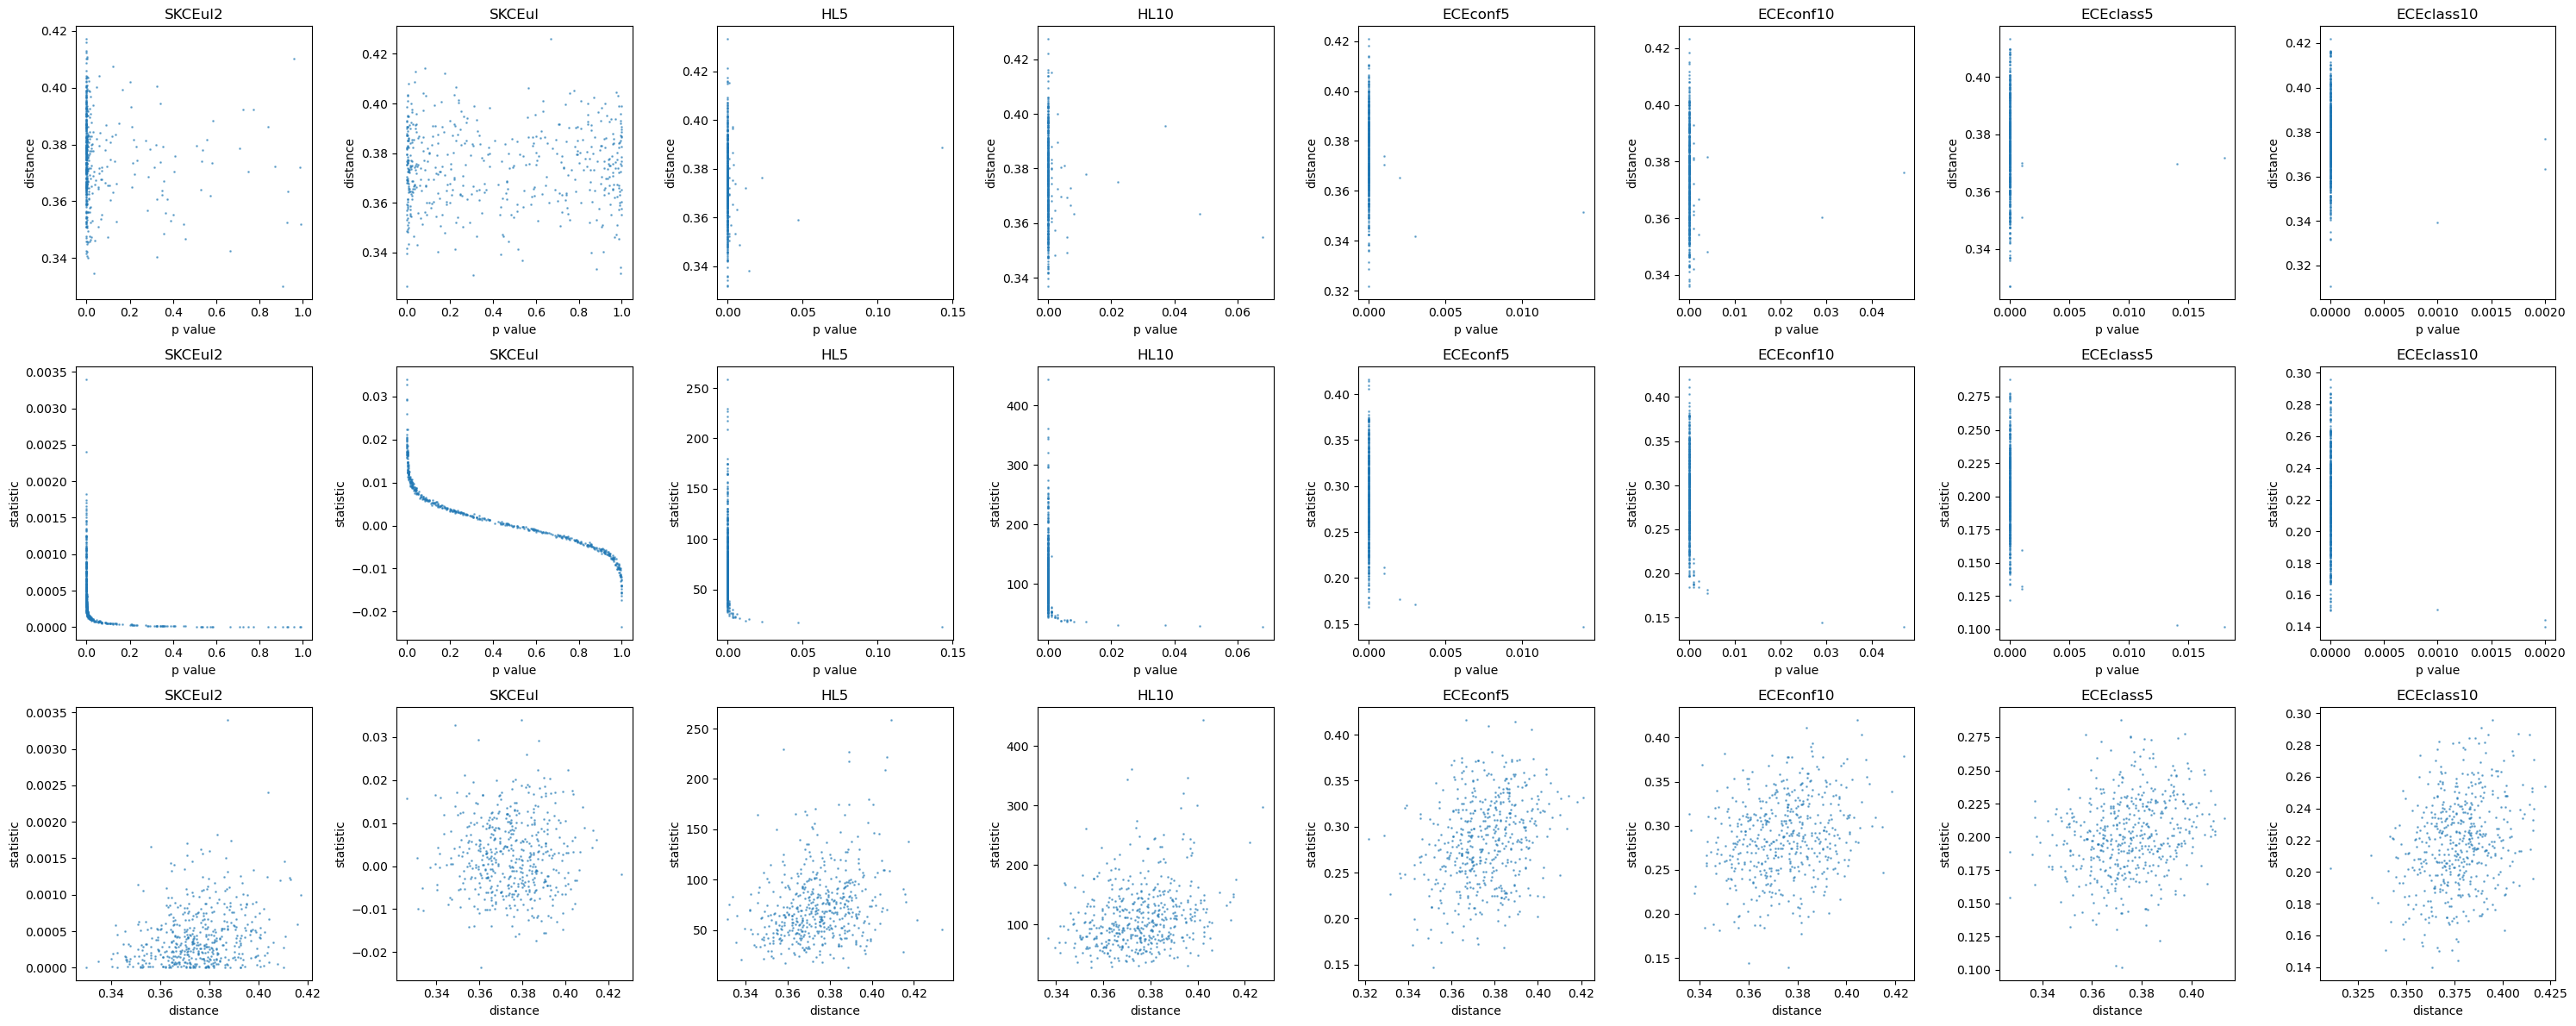

In [86]:

df = df_dummy_euc

fig, ax = plt.subplots(3, 8, figsize=(30, 12))

for i in range(3):
    count = 0
    for j in range(len(df.keys())):
        idx = df.keys()[count]
        #ax[0, j].set_title(idx)
        list_df_p_vals = literal_eval(df[idx][0])
        list_df_dist = literal_eval(df[idx][1])
        list_df_stats = literal_eval(df[idx][2])
        if i == 0:
            ax[i, j].scatter(list_df_p_vals, list_df_dist, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('p value')
            ax[i, j].set_ylabel('distance')
            ax[i, j].set_title(idx)
        elif i == 1:
            ax[i, j].scatter(list_df_p_vals, list_df_stats, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('p value')
            ax[i, j].set_ylabel('statistic')
            ax[i, j].set_title(idx)
        elif i == 2:
            ax[i, j].scatter(list_df_dist, list_df_stats, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('distance')
            ax[i, j].set_ylabel('statistic')
            ax[i, j].set_title(idx)

plt.tight_layout()

In [66]:
fig, ax = plt.subplots(3, 8, figsize=(30, 12))
for i in range(3):
    count= 0
    for j in range(8):
        idx = df_dists_w1.keys()[count]
        ax[0, j].set_title(idx)
        list_df_p_vals = convert_str_to_list(df_dists_w1[idx][0])
        list_df_dist = convert_str_to_list(df_dists_w1[idx][1])
        list_df_stats = convert_str_to_list(df_dists_w1[idx][2])
        #convert strings to lists
        if i == 0:
            ax[i, j].scatter(list_df_p_vals, list_df_dist, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('p value')
            ax[i, j].set_ylabel('distance')
            ax[i, j].set_title(idx)
        elif i == 1:
            ax[i, j].scatter(list_df_p_vals, list_df_stats, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('p value')
            ax[i, j].set_ylabel('statistic')
            ax[i, j].set_title(idx)
        elif i == 2:
            ax[i, j].scatter(list_df_dist, list_df_stats, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('distance')
            ax[i, j].set_ylabel('statistic')
            ax[i, j].set_title(idx)

plt.tight_layout()




/var/folders/mf/gnm849bj4fq5xnqhl_bdhf9m0000gn/T/ipykernel_20582/207321584.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


ValueError: Image size of 174442x1007 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x1200 with 24 Axes>

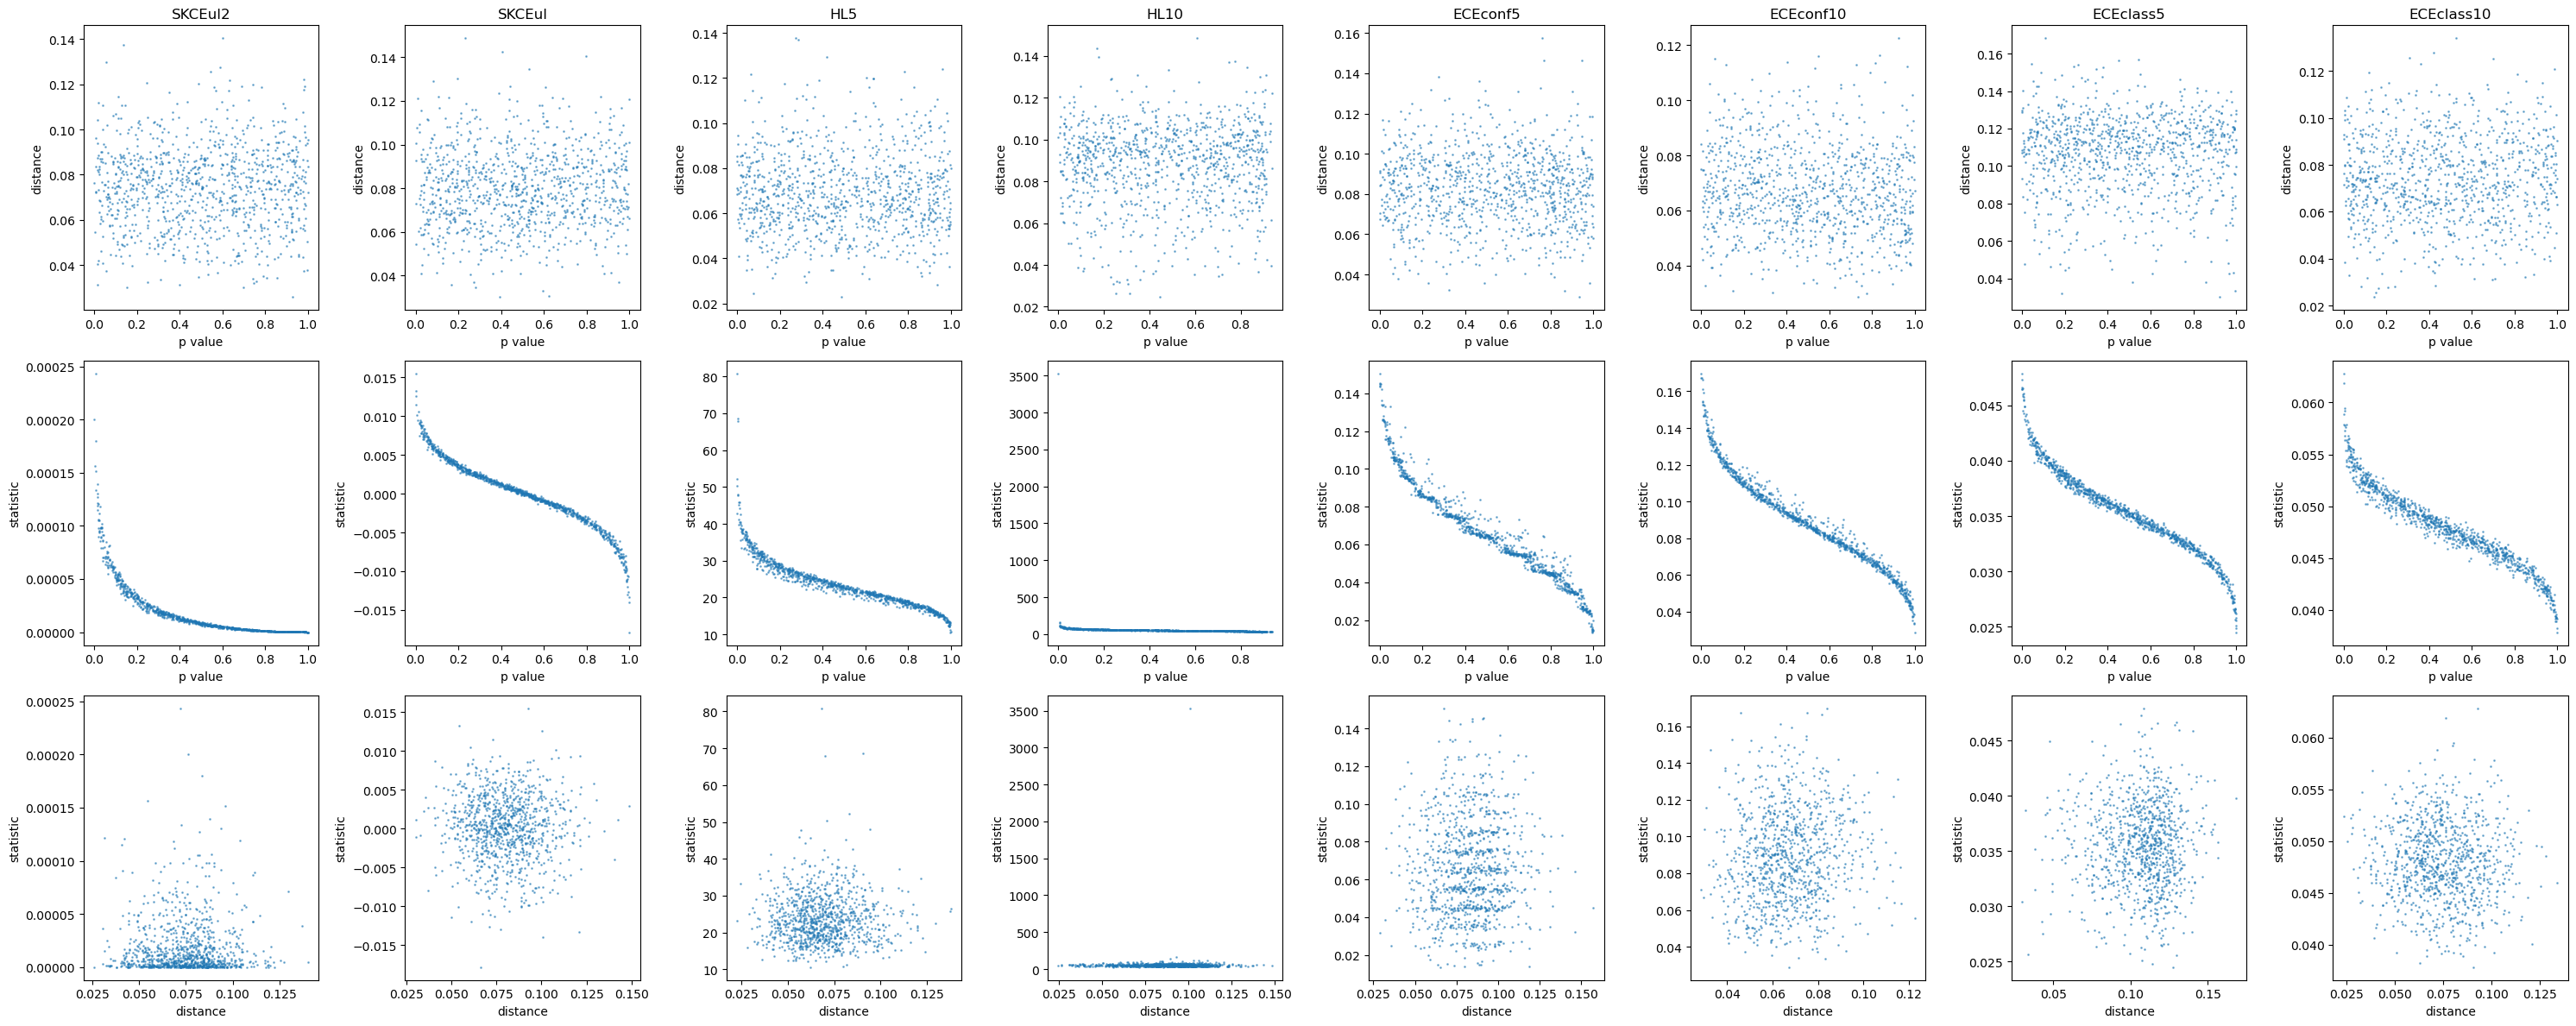

In [91]:
fig, ax = plt.subplots(3, 8, figsize=(30, 12))

for i in range(3):
    count= 0
    for j in range(8):
        idx = df_dists_w1.keys()[count]
        ax[0, j].set_title(idx)
        list_df_p_vals = convert_str_to_list(df_dist_euc[idx][0])
        list_df_dist = convert_str_to_list(df_dist_euc[idx][1])
        list_df_stats = convert_str_to_list(df_dist_euc[idx][2])
        #convert strings to lists
        if i == 0:
            ax[i, j].scatter(list_df_p_vals, list_df_dist, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('p value')
            ax[i, j].set_ylabel('distance')
          #  ax[i, j].set_title(idx)
        elif i == 1:
            ax[i, j].scatter(list_df_p_vals, list_df_stats, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('p value')
            ax[i, j].set_ylabel('statistic')
           # ax[i, j].set_title(idx)
        elif i == 2:
            ax[i, j].scatter(list_df_dist, list_df_stats, s=1, alpha=0.5)
            count += 1
            ax[i, j].set_xlabel('distance')
            ax[i, j].set_ylabel('statistic')
           # ax[i, j].set_title(idx)

plt.tight_layout()

### Simplified example

In [72]:
def dummy_analysis(conf, n_iter: int = 100, n_features: int = 1000, n_classes: int = 3):

    p_probs, y = experiment_h0_const_preds(N=n_features, K=n_classes)

    p_vals = []
    dists = []
    stats = []
    min_p_val = 1
    for i in tqdm(range(n_iter)):
        # random predictions
        p_bar = np.random.dirichlet(np.ones(n_classes), size=n_features)
        # compute distances
        dist = avg_kl_divergence(p_probs, p_bar)
        # compute p-values, distances and test statistics
        _, p_val, test_statistic = npbe_test_vaicenavicius(p_bar, 
                                                                    y, params=conf)
        mean_stat = 100 if stats == [] else np.mean(stats)
        if p_val < min_p_val and test_statistic <= mean_stat:
            min_p_val = p_val
            prop_min = p_bar
            stat_min = test_statistic
        p_vals.append(p_val)
        dists.append(dist)
        stats.append(test_statistic)

    return p_vals, dists, stats, prop_min, stat_min, min_p_val

In [76]:
p_vals, dists, stats, prop_min, stat_min, min_p_val = dummy_analysis(conf=config_p_value_analysis["SKCEul"]["params"], n_iter=100, n_features=1000, n_classes=10)

  0%|          | 0/100 [01:13<?, ?it/s]


KeyboardInterrupt: 

In [73]:
p_vals, dists, stats, prop_min, stat_min, min_p_val = dummy_analysis(conf=config_p_value_analysis["SKCEul"]["params"], n_iter=100, n_features=1000, n_classes=5)

100%|██████████| 100/100 [2:30:06<00:00, 90.06s/it] 


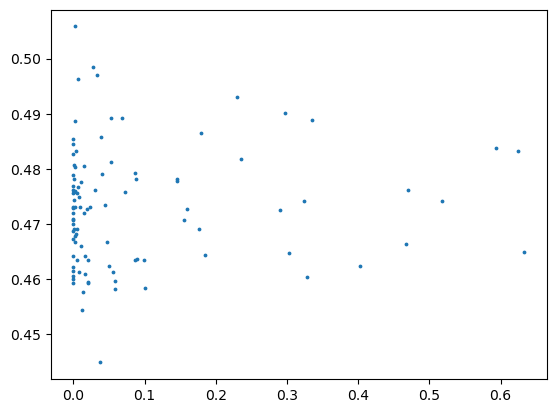

In [79]:
plt.scatter(p_vals, dists, s =3, alpha=1)
#plt.scatter(min_p_val, stat_min, s=10, c='r')

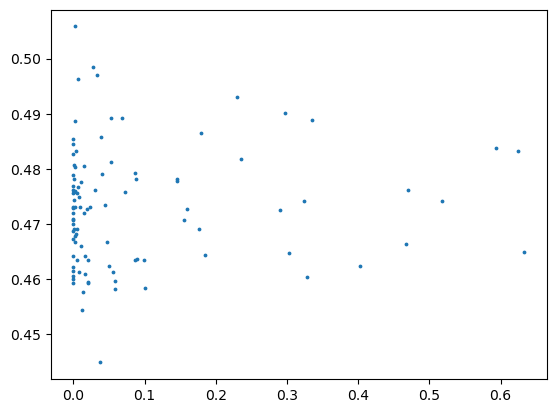

In [75]:
plt.scatter(p_vals, dists, s =3, alpha=1)

In [68]:
N_ITERATIONS = 100
N_INSTANCES = 1000
N_CLASSES = 3
conf = config_p_value_analysis["SKCEul"]["params"]

# matrix with constant predictions and labels sampled accordingly
p_probs, y = experiment_h0_const_preds(N=N_INSTANCES, K=N_CLASSES)

p_vals = []
dists = []
stats = []
min_p_val = 1
for i in tqdm(range(N_ITERATIONS)):
    # random predictions
    p_bar = np.random.dirichlet(np.ones(N_CLASSES), size=N_INSTANCES)
    # compute distances
    dist = avg_kl_divergence(p_probs, p_bar)
    # compute p-values, distances and test statistics
    _, p_val, test_statistic = npbe_test_vaicenavicius(p_bar, 
                                                                   y, params=conf)
    mean_stat = 100 if stats == [] else np.mean(stats)
    if p_val < min_p_val and test_statistic <= mean_stat:
        min_p_val = p_val
        prop_min = p_bar
    p_vals.append(p_val)
    dists.append(dist)
    stats.append(test_statistic)
    

100%|██████████| 100/100 [7:32:03<00:00, 271.24s/it]   


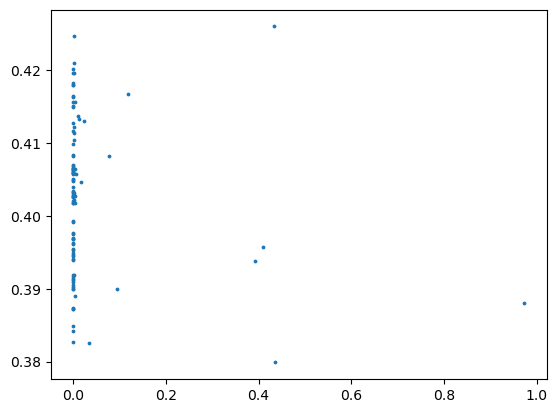

In [70]:
plt.scatter(p_vals, dists, s=3, alpha=1)
plt.scatter(min_p_val, )

In [71]:
prop_min

array([[0.13664762, 0.035039  , 0.82831338],
       [0.14104888, 0.51172736, 0.34722376],
       [0.10813788, 0.72320682, 0.1686553 ],
       ...,
       [0.17520975, 0.0877188 , 0.73707146],
       [0.47598023, 0.02308894, 0.50093082],
       [0.00239164, 0.92255445, 0.07505391]])

In [20]:
df_h0

,SKCEul2,SKCEul,HL5,HL10,ECEconf5,ECEconf10,ECEclass5,ECEclass10
0,0.394,0.794,0.452,0.445,0.274,0.329,0.900,0.971
1,0.990,0.165,0.753,0.729,0.612,0.361,0.654,0.435
2,0.674,0.395,0.036,0.413,0.875,0.725,0.756,0.771
3,0.681,0.451,0.220,0.126,0.379,0.149,0.136,0.008
4,0.114,0.036,0.052,0.365,0.888,0.830,0.398,0.332
...,...,...,...,...,...,...,...,...
95,0.534,0.787,0.507,0.388,0.097,0.695,0.029,0.384
96,0.754,0.410,0.350,0.564,0.319,0.695,0.997,0.402
97,0.023,0.252,0.086,0.598,0.003,0.710,0.124,0.588
98,0.198,0.624,0.959,0.134,0.098,0.642,0.146,0.690


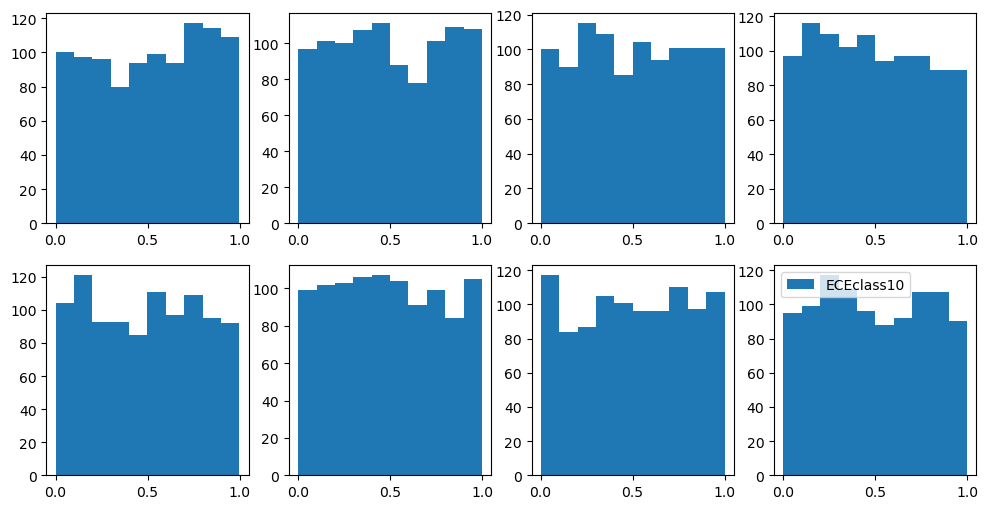

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax[0, 0].hist(df_h0['SKCEul2'], label='SKCEul2')
ax[0, 1].hist(df_h0['SKCEul'], label='SKCEul')
ax[0, 2].hist(df_h0['HL5'], label='HL5')
ax[0, 3].hist(df_h0['HL10'], label='HL10')
ax[1, 0].hist(df_h0['ECEconf5'], label='ECEconf5')
ax[1, 1].hist(df_h0['ECEconf10'], label='ECEconf10')
ax[1, 2].hist(df_h0['ECEclass5'], label='ECEclass5')
ax[1, 3].hist(df_h0['ECEclass10'], label='ECEclass10')
plt.legend()

In [38]:
tuple([t for t in config_p_value_analysis])

('SKCEul2',
 'SKCEul',
 'HL5',
 'HL10',
 'ECEconf5',
 'ECEconf10',
 'ECEclass5',
 'ECEclass10')